In [1]:
#Libraries req
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the grayscale image
img_path = "test_img.png"
if not os.path.exists(img_path):
  raise FileNotFoundError(f"The image file '{img_path}' does not exist.")

img = cv2.imread(img_path)

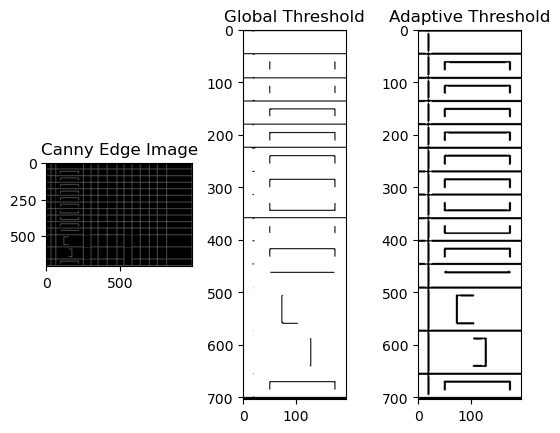

True

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img_path = "test_img.png"
if not os.path.exists(img_path):
    raise FileNotFoundError(f"The image file '{img_path}' does not exist.")

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Constants for Canny edge detection
LOWER_CANNY_THRESHOLD = 80
UPPER_CANNY_THRESHOLD = 180

# Constants for edge counting
EDGE_COUNT_THRESHOLD = 25  # Minimum edges to consider a valid column
MIN_COLUMN_WIDTH = 40  # Minimum width for a valid column

# Function to find column boundaries based on edge counts
def find_column_boundaries(edge_count, threshold, min_width):
    column_boundaries = []
    inside_column = False

    for i in range(len(edge_count)):
        if edge_count[i] > threshold and not inside_column:
            column_boundaries.append(i)  # Start of a new column
            inside_column = True
        elif edge_count[i] <= threshold and inside_column:
            column_boundaries.append(i)  # End of the column
            inside_column = False

    valid_columns = []
    i = 0
    while i < len(column_boundaries) - 1:
        start = column_boundaries[i]
        end = column_boundaries[i + 1]
        if end - start >= min_width:
            valid_columns.append((start, end))
        i += 2

    return valid_columns

# Apply Canny edge detection
canny_image = cv2.Canny(img, LOWER_CANNY_THRESHOLD, UPPER_CANNY_THRESHOLD)

# Count edges in each column and find boundaries
edge_count = np.sum(canny_image == 255, axis=0)
valid_columns = find_column_boundaries(edge_count, EDGE_COUNT_THRESHOLD, MIN_COLUMN_WIDTH)

# Crop the original image based on valid columns
if valid_columns:
    # Get the start and end column indices
    start_col, end_col = max(valid_columns, key=lambda x: x[1] - x[0])

    # Adjust start_col and end_col to remove 10 pixels from each side
    start_col = min(start_col + 10, end_col - 10)  # Ensure it doesn't exceed other boundaries
    end_col = max(start_col + 10, min(end_col - 10, img.shape[1]))  # Avoid going out of image bounds

    cropped_image = img[:, start_col:end_col]

# Create binary images using global and adaptive thresholding
global_threshold = 150  # Example threshold value
_, binary_image_global = cv2.threshold(
    cropped_image, global_threshold, 255, cv2.THRESH_BINARY
)

adaptive_threshold_size = 11  # Size of the neighborhood for adaptive thresholding
adaptive_constant = 2  # Constant subtracted from the adaptive threshold
binary_image_adaptive = cv2.adaptiveThreshold(
    cropped_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, adaptive_threshold_size, adaptive_constant
)

# Visualize the results
plt.subplot(1, 3, 1)
plt.imshow(canny_image, cmap='gray')
plt.title("Canny Edge Image")

plt.subplot(1, 3, 2)
plt.imshow(binary_image_global, cmap='gray')
plt.title("Global Threshold")

plt.subplot(1, 3, 3)
plt.imshow(binary_image_adaptive, cmap='gray')
plt.title("Adaptive Threshold")

plt.show()

# Optional: Save the binary images if needed
cv2.imwrite("binary_image_global.jpg", binary_image_global)
cv2.imwrite("binary_image_adaptive.jpg", binary_image_adaptive)
